In [1]:
cd ..

/home/astro/phrdhx/automated_exocomet_hunt


In [2]:
from analysis_tools_cython import *
from glob import glob
import matplotlib.pyplot as plt
import random

In [47]:
files = glob("/storage/astro2/phrdhx/tesslcs/tesslcs_sector_6_104/tesslcs_tmag_5_6/*")


In [48]:
for i in files[0:15]:
    data, lc_info = import_XRPlightcurve(i, sector=6, drop_bad_points=False,return_type='pandas')
    time_range = data["time"][
    data["time"].between(
        data["time"].min() + 1, data["time"].max() - 1, inclusive=False
        )
    ].reset_index(
        drop=True
    ) 
    injected_time_index, injected_time = random.choice(list(enumerate(time_range)))
    depth = 10 ** np.random.uniform(-4, -2, 1)[0]
    comet = -comet_curve(data['time'],depth, injected_time,  3.02715600e-01, 3.40346173e-01)
    data['corrected flux'] = np.ones(len(data['corrected flux'])) * comet


In [49]:
data

,time,raw flux,corrected flux,PCA flux,flux error,quality
0,1469.016198,152757.691406,-2.386805e-56,154678.210542,10.657139,0
1,1469.037031,152748.285156,-6.912054e-56,154653.020136,10.656769,0
2,1469.057864,152793.132812,-1.992235e-55,154680.440864,10.658422,0
3,1469.078698,152853.984375,-5.715008e-55,154630.916930,10.660564,0
4,1469.099531,152811.574219,-1.631685e-54,154605.907531,10.659030,0
...,...,...,...,...,...,...
898,1489.953296,157347.714844,-5.123785e-25,154562.910990,10.816143,0
899,1489.974129,157339.250000,-4.819564e-25,154586.420953,10.815813,65536
900,1489.994962,157445.980469,-4.533405e-25,154663.238929,10.819077,0
901,1490.015794,157466.132812,-4.264237e-25,154640.778510,10.819170,65536


In [50]:
data['time'].diff().round(6).unique()

array([     nan, 0.020833, 2.249962])

In [51]:
data['time'][data['time'].diff().round(6) == 2.249962]

385    1479.266088
Name: time, dtype: float64

In [52]:
data['time'].loc[380:390]

380    1476.932794
381    1476.953627
382    1476.974460
383    1476.995293
384    1477.016126
385    1479.266088
386    1479.286920
387    1479.307753
388    1479.328586
389    1479.349419
390    1479.370252
Name: time, dtype: float64

In [53]:
data['corrected flux'].loc[380:390]

380   -2.109797e-08
381   -1.984527e-08
382   -1.866694e-08
383   -1.755859e-08
384   -1.651604e-08
385   -2.222646e-11
386   -2.090676e-11
387   -1.966541e-11
388   -1.849777e-11
389   -1.739946e-11
390   -1.636636e-11
Name: corrected flux, dtype: float64

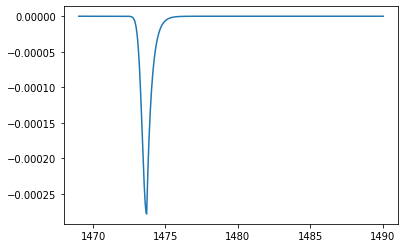

In [54]:
plt.plot(data['time'],data['corrected flux'])

In [55]:
data

,time,raw flux,corrected flux,PCA flux,flux error,quality
0,1469.016198,152757.691406,-2.386805e-56,154678.210542,10.657139,0
1,1469.037031,152748.285156,-6.912054e-56,154653.020136,10.656769,0
2,1469.057864,152793.132812,-1.992235e-55,154680.440864,10.658422,0
3,1469.078698,152853.984375,-5.715008e-55,154630.916930,10.660564,0
4,1469.099531,152811.574219,-1.631685e-54,154605.907531,10.659030,0
...,...,...,...,...,...,...
898,1489.953296,157347.714844,-5.123785e-25,154562.910990,10.816143,0
899,1489.974129,157339.250000,-4.819564e-25,154586.420953,10.815813,65536
900,1489.994962,157445.980469,-4.533405e-25,154663.238929,10.819077,0
901,1490.015794,157466.132812,-4.264237e-25,154640.778510,10.819170,65536


In [56]:
data = data[['time','corrected flux','quality', 'flux error']]

In [57]:
data = Table.from_pandas(data)

In [58]:
time, flux, quality, real, flux_error = clean_data(data)

In [59]:
dataframe = pd.DataFrame(data=[time, flux, quality, real, flux_error]).T
columns = ['time','flux','quality','real','flux error']
dataframe.columns = columns

In [64]:
dataframe

,time,flux,quality,real,flux error
0,1469.016198,-2.386805e-56,0.0,1.0,10.657139
1,1469.037031,-6.912054e-56,0.0,1.0,10.656769
2,1469.057864,-1.992235e-55,0.0,1.0,10.658422
3,1469.078698,-5.715008e-55,0.0,1.0,10.660564
4,1469.099531,-1.631685e-54,0.0,1.0,10.659030
...,...,...,...,...,...
1005,1489.953296,-5.123785e-25,0.0,1.0,10.816143
1006,1489.974129,-4.819564e-25,65536.0,1.0,10.815813
1007,1489.994962,-4.533405e-25,0.0,1.0,10.819077
1008,1490.015794,-4.264237e-25,65536.0,1.0,10.819170


In [60]:
data = data.to_pandas()

In [61]:
time_range = data["time"][
data["time"].between(
    data["time"].min() + 1, data["time"].max() - 1, inclusive=False
    )
].reset_index(
    drop=True
) 
injected_time_index, injected_time = random.choice(list(enumerate(time_range)))
depth = 10 ** np.random.uniform(-4, -2, 1)[0]
comet = -comet_curve(data['time'],depth, injected_time,  3.02715600e-01, 3.40346173e-01)

In [63]:
data

,time,corrected flux,quality,flux error
0,1469.016198,-2.386805e-56,0,10.657139
1,1469.037031,-6.912054e-56,0,10.656769
2,1469.057864,-1.992235e-55,0,10.658422
3,1469.078698,-5.715008e-55,0,10.660564
4,1469.099531,-1.631685e-54,0,10.659030
...,...,...,...,...
898,1489.953296,-5.123785e-25,0,10.816143
899,1489.974129,-4.819564e-25,65536,10.815813
900,1489.994962,-4.533405e-25,0,10.819077
901,1490.015794,-4.264237e-25,65536,10.819170


In [14]:
data, lc_info = import_XRPlightcurve("betapic/xrp/tesslcs_sector_6_104_2_min_cadence_targets_tesslc_270577175.pkl", sector = 6,drop_bad_points=True,return_type='pandas')

In [15]:
data = data[['time','corrected flux','quality','flux error']]
data

,time,corrected flux,quality,flux error
0,1469.054182,347154.047476,0,16.086005
1,1469.095848,347135.546362,0,16.084751
2,1469.116681,347122.484464,0,16.084546
3,1469.137515,347115.208144,0,16.084376
4,1469.179181,347110.703011,0,16.084105
...,...,...,...,...
805,1489.783223,347143.024150,0,16.088510
806,1489.804056,347137.336793,0,16.088208
807,1489.824889,347106.924648,0,16.087802
808,1489.845722,347096.642137,0,16.087608


---

In [22]:
import numpy as np

In [26]:
array = np.ones(len(data['time']))
array = array * comet

In [27]:
time_range = data["time"][
data["time"].between(
    data["time"].min() + 1, data["time"].max() - 1, inclusive=False
    )
].reset_index(
    drop=True
) 
injected_time_index, injected_time = random.choice(list(enumerate(time_range)))
depth = 10 ** np.random.uniform(-4, -2, 1)[0]
comet = -comet_curve(data['time'],depth, injected_time,  3.02715600e-01, 3.40346173e-01)